In [ ]:
# Core RFM + Churn Analysis

In [1]:
pip install squarify

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import squarify
import seaborn as sns

In [4]:
from sklearn.metrics import silhouette_score

In [12]:
tbl_customers = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_customers.csv')
tbl_customer_accounts = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_customer_accounts.csv')
tbl_customer_reviews = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_customer_reviews.csv')
tbl_orders = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_orders.csv')
tbl_products = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_products.csv')
tbl_labelled_reviews = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_labelled_reviews.csv')
tbl_addresses = pd.read_csv('C:/Users/sam/Desktop/MA/data_marketing_analytics_2023/tbl_addresses.csv')

In [13]:
tbl_orders.columns


Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime'],
      dtype='object')

In [22]:
tbl_customers

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True
...,...,...,...,...,...,...,...,...
140941,449222,428121,1945-05-30,F,NaN,libero.it,1.0,True
140942,368113,346970,1943-11-18,F,NaN,yahoo.com,1.0,True
140943,424451,403292,1943-05-07,F,NaN,gmail.com,1.0,True
140944,808137,789737,1943-02-13,F,NaN,yahoo.it,1.0,True


In [8]:
tbl_addresses

,address_id,postal_code,district,region
0,1337,20083.0,MI,LOMBARDIA
1,1347,20090.0,MI,LOMBARDIA
2,1347,20090.0,MI,LOMBARDIA
3,1347,20090.0,MI,LOMBARDIA
4,1347,20090.0,MI,LOMBARDIA
...,...,...,...,...
245420,34811,40011.0,BO,EMILIA ROMAGNA
245421,651219,35030.0,PD,VENETO
245422,570394,47924.0,RN,EMILIA ROMAGNA
245423,670325,84030.0,SA,CAMPANIA


In [7]:
tbl_customer_accounts.columns

Index(['customer_id', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')

In [9]:
tbl_customer_accounts

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23
...,...,...,...,...,...,...
169489,828458,895971,47,standard,1,2023-04-09
169490,575891,525794,1,standard,1,2022-09-14
169491,316991,231471,14,standard,1,2022-04-15
169492,403638,329448,1,standard,1,2022-05-31


In [10]:
tbl_customer_accounts['loyalty_type'].value_counts()

standard             124116
premium               28039
business standard     13123
business premium       4216
Name: loyalty_type, dtype: int64

In [17]:
tbl_customer_reviews.columns

Index(['review_id', 'customer_id', 'review_text'], dtype='object')

In [18]:
tbl_orders.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime'],
      dtype='object')

In [51]:
tbl_orders.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime'],
      dtype='object')

In [14]:
tbl_orders

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851
...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217


In [27]:
dataset = pd.merge(tbl_orders, tbl_customers, on='customer_id', how='left' ) #1.039.865
dataset = pd.merge(dataset, tbl_addresses, on='address_id', how='left' ) #1.650.451
dataset = pd.merge(dataset,  tbl_customer_accounts, on='customer_id', how='left' ) #1.654.841
dataset = pd.merge(dataset,  tbl_products, on='product_id', how='left' ) #1.654.841

In [30]:
dataset

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,address_id,birthdate,...,flag_privacy,postal_code,district,region,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,product_class
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,6
1,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,6
2,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,6
3,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,6
4,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851,21,1978-08-14,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654836,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217,899836,1979-05-18,...,True,70010.0,BA,PUGLIA,927866,46,standard,1,2023-04-30,9
1654837,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217,899836,1979-05-18,...,True,70010.0,BA,PUGLIA,927866,46,standard,1,2023-04-30,9
1654838,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217,899836,1979-05-18,...,True,70010.0,BA,PUGLIA,927866,46,standard,1,2023-04-30,9
1654839,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217,899836,1979-05-18,...,True,70010.0,BA,PUGLIA,927866,46,standard,1,2023-04-30,9


In [17]:
data = data.loc[:, ~data.columns.isin(['Unnamed: 0_x','job_type','email_provider','Unnamed: 0_y', 'last_purchase_date', 'last_day_tot_amount', 'last_day_num_products',
       'days_from_last_purchase', 'Unnamed: 0','loyatlty_status', 'loyalty_code'])]

In [18]:
data

,customer_id,account_id,favorite_store,loyalty_type,activation_date,address_id,birthdate,gender,flag_phone_provided,flag_privacy,product_id,product_class,order_id,store_id,direction,gross_price,price_reduction,purchase_datetime
0,9557,746573,9,premium,2023-01-11,8460,1977-03-20,M,1.0,True,36142274,6,f4028cd8175457c3916581a91fe85fd0,9,1,12.90,1.29,2023-03-13T154623
1,9557,746573,9,premium,2023-01-11,8460,1977-03-20,M,1.0,True,81273175,13,d0f81b8c0d6881215ba7ac29b6aac928,9,1,5.98,0.00,2023-01-11T132637
2,9557,746573,9,premium,2023-01-11,8460,1977-03-20,M,1.0,True,32756010,11,f4028cd8175457c3916581a91fe85fd0,9,1,34.95,3.49,2023-03-13T154623
3,9557,746573,9,premium,2023-01-11,8460,1977-03-20,M,1.0,True,36141315,6,f4028cd8175457c3916581a91fe85fd0,9,1,41.80,4.18,2023-03-13T154623
4,9557,746573,9,premium,2023-01-11,8460,1977-03-20,M,1.0,True,32756003,11,f4028cd8175457c3916581a91fe85fd0,9,1,6.99,0.70,2023-03-13T154623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043029,934581,927773,29,standard,2023-04-30,899757,1979-09-28,M,NaN,True,35508942,2,697c0078b69d9f8c119d8dd9a7952019,29,1,33.60,0.00,2023-04-30T193553
1043030,934620,927816,44,standard,2023-04-30,899796,1964-01-29,F,NaN,True,36237691,13,86c9c4fdb8829e2ab90a86a357763419,44,1,11.99,0.00,2023-04-30T191955
1043031,934620,927816,44,standard,2023-04-30,899796,1964-01-29,F,NaN,True,81259479,13,86c9c4fdb8829e2ab90a86a357763419,44,1,9.99,0.00,2023-04-30T191955
1043032,934660,927866,46,standard,2023-04-30,899836,1979-05-18,F,NaN,True,34067775,9,86f8ca9e4008249e5e0acc5ff23e2284,46,1,1.90,0.00,2023-04-30T193217


In [64]:
tbl_addresses.columns

Index(['address_id', 'postal_code', 'district', 'region'], dtype='object')

In [67]:
dataset = pd.merge(tbl_orders, tbl_customers, on='customer_id') #1.039.865
dataset = pd.merge(dataset,  tbl_customer_accounts, on='customer_id') #1.654.841
dataset = pd.merge(dataset, tbl_addresses, on='address_id') #1.650.451
dataset = pd.merge(dataset,  tbl_products, on='product_id' ) #1.654.841
dataset.

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,address_id,birthdate,...,flag_privacy,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,postal_code,district,region,product_class
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04T182851,21,1978-08-14,...,True,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6
1,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04T182851,21,1978-08-14,...,True,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6
2,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04T182851,21,1978-08-14,...,True,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6
3,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04T182851,21,1978-08-14,...,True,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6
4,bfe77aedcfc4098926ad5b133cec4a1d,900,18,35551922,1,229.90,22.99,2023-01-08T135407,812,1983-05-28,...,True,738432,22,business premium,1,2023-01-05,30016.0,VE,VENETO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643821,865be2ee5cf3e17230c66115dc93c60a,663065,49,81259510,1,2.99,0.00,2023-01-08T175119,647467,1983-01-22,...,True,624494,49,standard,1,2022-11-03,28040.0,NO,PIEMONTE,13
1643822,865be2ee5cf3e17230c66115dc93c60a,663065,49,81259510,1,2.99,0.00,2023-01-08T175119,647467,1983-01-22,...,True,624494,49,standard,1,2022-11-03,28040.0,NO,PIEMONTE,13
1643823,865be2ee5cf3e17230c66115dc93c60a,663065,49,81259510,1,2.99,0.00,2023-01-08T175119,647467,1983-01-22,...,True,624494,49,standard,1,2022-11-03,28040.0,NO,PIEMONTE,13
1643824,414fe1aafa7047d4be69798f5b03e06e,785772,44,81259510,1,5.98,0.00,2023-01-20T154344,770425,1970-11-21,...,True,761169,44,standard,1,2023-01-20,30173.0,VE,VENETO,13


In [66]:
dataset.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'address_id',
       'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'account_id', 'favorite_store',
       'loyalty_type', 'loyatlty_status', 'activation_date', 'postal_code',
       'district', 'region', 'product_class'],
      dtype='object')

In [80]:
dataset['purchase_date'] = pd.to_datetime(dataset['purchase_datetime'], format='%Y-%m-%d')
last_order = dataset.groupby('customer_id')['purchase_date'].max().reset_index()
last_order.head(2)

,customer_id,purchase_date
0,23,2023-02-20 11:51:51
1,30,2022-07-23 07:06:38


In [77]:
dataset[dataset['customer_id'] == 23]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,address_id,birthdate,...,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,postal_code,district,region,product_class,purchase_date
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
1,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
2,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
3,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
2951,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37542,8b3bbc136572e9ef8e5f8356b4a28038,23,49,36501640,1,1.80,0.0,2023-02-20T115151,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,7,2023-02-20 11:51:51
39347,8b3bbc136572e9ef8e5f8356b4a28038,23,49,35606452,1,3.95,0.0,2023-02-20T115151,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,9,2023-02-20 11:51:51
39348,8b3bbc136572e9ef8e5f8356b4a28038,23,49,35606452,1,3.95,0.0,2023-02-20T115151,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,9,2023-02-20 11:51:51
39349,8b3bbc136572e9ef8e5f8356b4a28038,23,49,35606452,1,3.95,0.0,2023-02-20T115151,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,9,2023-02-20 11:51:51


In [81]:
datas = dataset.drop_duplicates()

In [85]:
datas.nunique()

order_id               368265
customer_id            102822
store_id                   48
product_id               2000
direction                   2
gross_price             12274
price_reduction          6378
purchase_datetime      363296
address_id             102687
birthdate               16636
gender                      2
job_type                    9
email_provider           6167
flag_phone_provided         1
flag_privacy                2
account_id             102882
favorite_store             49
loyalty_type                4
loyatlty_status             2
activation_date           486
postal_code              3932
district                  176
region                     20
product_class              14
purchase_date          363296
dtype: int64

In [82]:
datas[datas['customer_id'] == 23]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,address_id,birthdate,...,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,postal_code,district,region,product_class,purchase_date
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
2951,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.00,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
4369,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.00,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
4373,7927c5116d8aae47d86b75f67ac94a6f,23,49,33794292,-1,-1.99,0.00,2022-11-17T104929,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-11-17 10:49:29
4777,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.00,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
4781,7927c5116d8aae47d86b75f67ac94a6f,23,49,33795776,-1,-5.10,0.00,2022-11-17T104929,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-11-17 10:49:29
5447,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.00,2022-10-04T182851,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,6,2022-10-04 18:28:51
6327,c2ae3673970490406925dcd3f8a4d486,23,49,35002296,1,1.70,0.17,2022-10-31T130742,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,3,2022-10-31 13:07:42
7306,c2ae3673970490406925dcd3f8a4d486,23,49,32157580,1,1.90,0.19,2022-10-31T130742,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,3,2022-10-31 13:07:42
9601,c2ae3673970490406925dcd3f8a4d486,23,49,35930902,1,0.70,0.07,2022-10-31T130742,21,1978-08-14,...,512658,49,standard,1,2022-09-08,21050.0,VA,LOMBARDIA,3,2022-10-31 13:07:42


In [71]:
last_order

,customer_id,purchase_date
0,23,2022-10-04 18:28:51
1,30,2022-06-11 18:41:54
2,32,2023-03-18 08:34:57
3,48,2022-08-11 14:58:17
4,50,2023-01-18 15:49:19
...,...,...
102817,934484,2023-04-30 19:02:11
102818,934581,2023-04-30 19:35:53
102819,934620,2023-04-30 19:19:55
102820,934660,2023-04-30 19:32:17


In [54]:
dataset.customer_id.nunique()

104134

In [62]:
# Group by 'customer_id' and count the number of orders for each customer
orders_per_customer = dataset.groupby('customer_id')['order_id'].count().reset_index()

# Rename the columns for clarity
orders_per_customer.columns = ['customer_id','order_count']
orders_per_customer



,customer_id,order_count
0,23,156
1,30,12
2,32,11
3,48,69
4,50,20
...,...,...
104129,934484,5
104130,934581,1
104131,934620,8
104132,934660,4


In [ ]:
dataset_nonActive= dataset.groupby('customer_id')['order_id'].count().reset_index()

In [61]:
# Group by 'customer_id' and count the number of orders for each customer
orders_per_customer = dataset.groupby('customer_id')['order_id'].count().reset_index()

# Rename the columns for clarity
orders_per_customer.columns = ['customer_id', 'order_count']


# Identify inactive customers (order count less than 10)
inactive_customers = orders_per_customer[orders_per_customer['order_count'] == 0]

# Calculate the percentage of inactive customers
total_customers = orders_per_customer.shape[0]
inactive_percentage = (inactive_customers.shape[0] / total_customers) * 100

# Display the result
print(f"Percentage of inactive customers with order 0: {inactive_percentage:.2f}%")

Percentage of inactive customers with order 0: 0.00%


In [354]:

recency_data = df.groupby('customer_id')['purchase_datetime'].max().reset_index()
recency_data['recency'] = (cutoff_date - recency_data['purchase_datetime']).dt.days
recency_data.drop('purchase_datetime', axis=1, inplace=True)


In [355]:
# Categorize customers as active or inactive based on the threshold

In [356]:

recency_data['status'] = recency_data['recency'].apply(lambda x: 'Active' if x <= 90 else 'Inactive')


In [357]:
recency_data

,customer_id,recency,status
0,2344,-76,Active
1,7821,156,Inactive
2,20211,-83,Active
3,34088,-56,Active
4,40587,13,Active
5,45132,101,Inactive
6,62076,139,Inactive
7,84587,45,Active
8,93263,-64,Active
9,112032,182,Inactive


In [358]:
recency_data.shape

(48, 3)

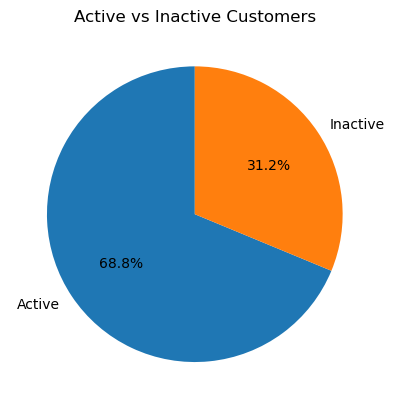

In [360]:
# Count the number of active and inactive customers
status_counts = recency_data['status'].value_counts()

# Create a pie plot
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Active vs Inactive Customers')

# Display the plot
plt.show()

In [ ]:
###  analyzing the repurchase time scale for customers and their next days of purchase

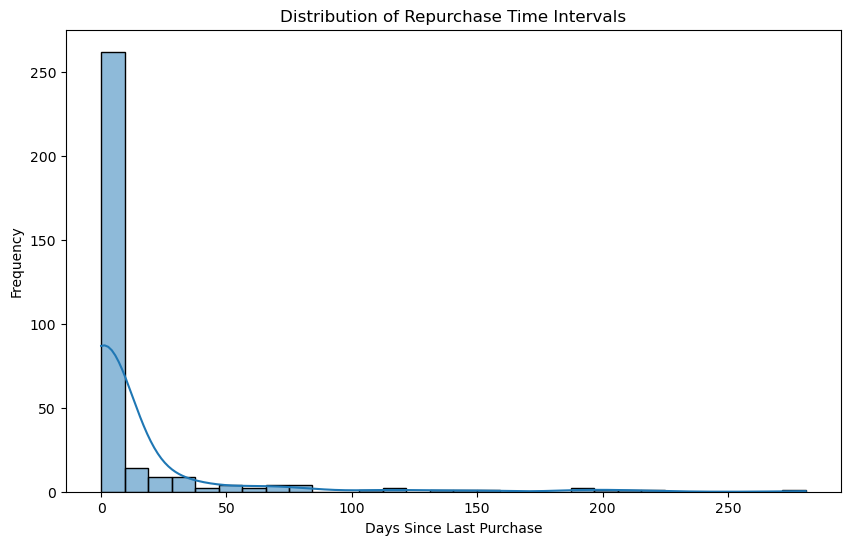

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'data.csv' with your actual data file)
#data = pd.read_csv('data.csv')

# Assuming your dataset has columns 'customer_id' and 'purchase_date'
# Make sure to sort the data by customer and purchase date
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])
df.sort_values(['customer_id', 'purchase_datetime'], inplace=True)

# Calculate time intervals between purchases for each customer
df['time_since_last_purchase'] = df.groupby('customer_id')['purchase_datetime'].diff()

# Convert time intervals to days for easier analysis
df['days_since_last_purchase'] = df['time_since_last_purchase'].dt.days

# Filter out the first purchase of each customer since there's no previous purchase
df = df[df['days_since_last_purchase'].notnull()]

# Visualize the distribution of repurchase time intervals
plt.figure(figsize=(10, 6))
sns.histplot(df['days_since_last_purchase'], bins=30, kde=True)
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Repurchase Time Intervals')
plt.show()


In [ ]:
### RFM analysis

In [ ]:
### Analysisng behaviour of each customer, we have set the threshold 90.

In [79]:
import datetime

# Set the cutoff date as the current date minus 90 days
# cutoff_date = datetime.datetime.now() - datetime.timedelta(days=90)

In [362]:
# Convert the 'purchase_datetime' column to datetime type
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Calculate Recency, which represents the number of days since the customer's last purchase
recency_data = df.groupby('customer_id')['purchase_datetime'].max().reset_index()
recency_data['recency'] = (cutoff_date - recency_data['purchase_datetime']).dt.days
recency_data.drop('purchase_datetime', axis=1, inplace=True)

# Calculate Frequency, which represents the total number of purchases made by each customer
frequency_data = df.groupby('customer_id')['purchase_datetime'].count().reset_index()
frequency_data.rename(columns={'purchase_datetime': 'frequency'}, inplace=True)

# Calculate Monetary, which represents the total spending of each customer
monetary_data = df.groupby('customer_id')['gross_price'].sum().reset_index()
monetary_data.rename(columns={'gross_price': 'monetary'}, inplace=True)

# Merge the Recency, Frequency, and Monetary data
rfm_data = pd.merge(recency_data, frequency_data, on='customer_id')
rfm_data = pd.merge(rfm_data, monetary_data, on='customer_id')

# Assign scores or ranks to each RFM value
rfm_data['recency_score'] = pd.qcut(rfm_data['recency'], q=5, labels=False)
rfm_data['frequency_score'] = pd.qcut(rfm_data['frequency'], q=5, labels=False, duplicates='drop')
rfm_data['monetary_score'] = pd.qcut(rfm_data['monetary'], q=5, labels=False)

# Calculate the RFM score by combining the individual scores
rfm_data['rfm_score'] = rfm_data['recency_score'] + rfm_data['frequency_score'] + rfm_data['monetary_score']


In [363]:
rfm_data.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,2344,-76,32,334.63,0,4,4,8
1,7821,156,2,9.80,4,0,1,5
2,20211,-83,4,7.94,0,2,0,2
3,34088,-56,16,73.60,1,4,3,8
4,45132,101,11,255.03,3,3,3,9


In [365]:
# Define rfm_level function
def rfm_level(rfm_data):
    if rfm_data['rfm_score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((rfm_data['rfm_score'] >= 8) and (rfm_data['rfm_score'] < 9)):
        return 'Champions'
    elif ((rfm_data['rfm_score'] >= 7) and (rfm_data['rfm_score'] < 8)):
        return 'Loyal'
    elif ((rfm_data['rfm_score'] >= 6) and (rfm_data['rfm_score'] < 7)):
        return 'Potential'
    elif ((rfm_data['rfm_score'] >= 5) and (rfm_data['rfm_score'] < 6)):
        return 'Promising'
    elif ((rfm_data['rfm_score'] >= 4) and (rfm_data['rfm_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm_data['RFM_Level'] = rfm_data.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_data.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,RFM_Level
0,2344,-76,32,334.63,0,4,4,8,Champions
1,7821,156,2,9.80,4,0,1,5,Promising
2,20211,-83,4,7.94,0,2,0,2,Require Activation
3,34088,-56,16,73.60,1,4,3,8,Champions
4,45132,101,11,255.03,3,3,3,9,Can't Loose Them


In [366]:
rfm_data["RFM_Level"].value_counts()

Champions             11
Require Activation    11
Potential              7
Promising              4
Can't Loose Them       4
Needs Attention        1
Loyal                  1
Name: RFM_Level, dtype: int64

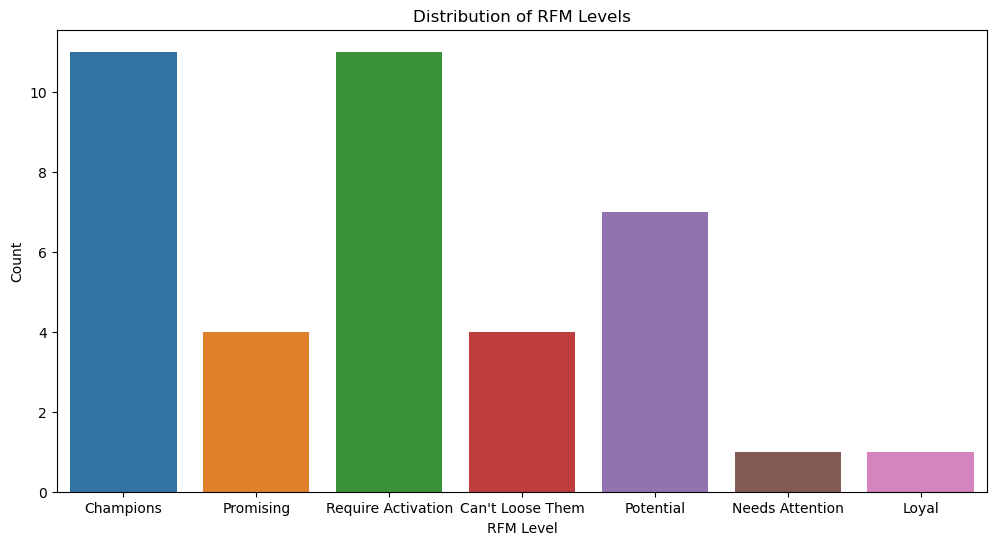

In [382]:
# Plot RFM levels
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm_data, x='RFM_Level')
plt.xlabel('RFM Level')
plt.ylabel('Count')
plt.title('Distribution of RFM Levels')
plt.show()

In [481]:
# # Mean, median, count statistics of different segments
# rfm_data[["RFM_Level","recency","frequency", "monetary"]].groupby("RFM_Level").agg(["mean","median","count"])

In [368]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_df_agg = rfm_data.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_df_agg)

                   recency frequency monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them      72.5      23.2    907.7     4
Champions             10.8      13.3    366.9    11
Loyal                -83.0      15.0    482.7     1
Needs Attention      -89.0       4.0     22.6     1
Potential             44.3       5.4     34.4     7
Promising            127.8       1.8     25.3     4
Require Activation   -12.0       1.7      7.4    11


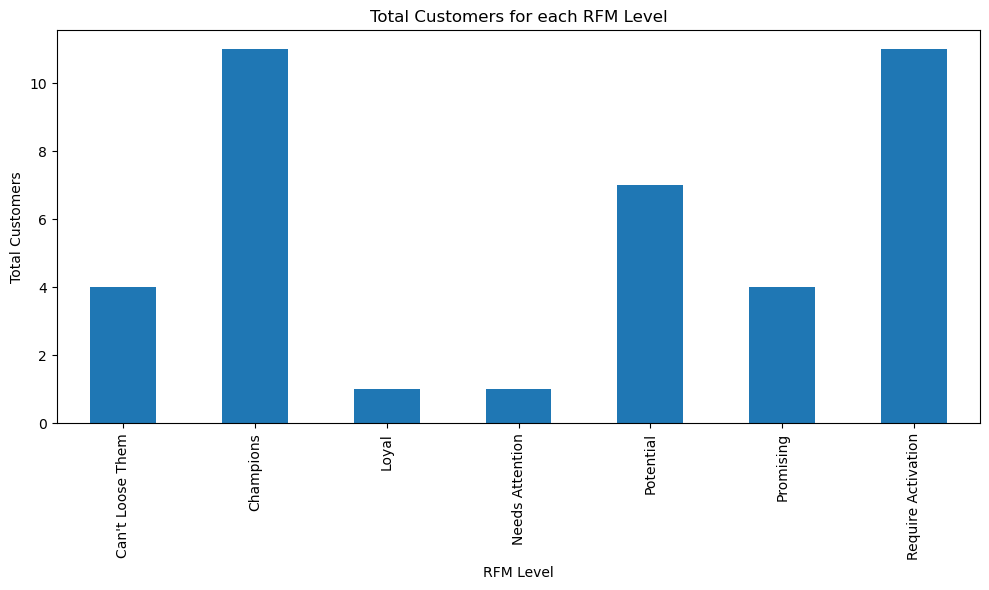

In [369]:
# Rename the columns for clarity
rfm_df_agg.columns = ['Avg. Recency', 'Avg. Frequency', 'Avg. Monetary', 'Total Customers']

# Plot the bar plot
rfm_df_agg['Total Customers'].plot(kind='bar', figsize=(10, 6))

# Customize the plot if needed
plt.xlabel('RFM Level')
plt.ylabel('Total Customers')
plt.title('Total Customers for each RFM Level')

# Display the plot
plt.tight_layout()
plt.show()

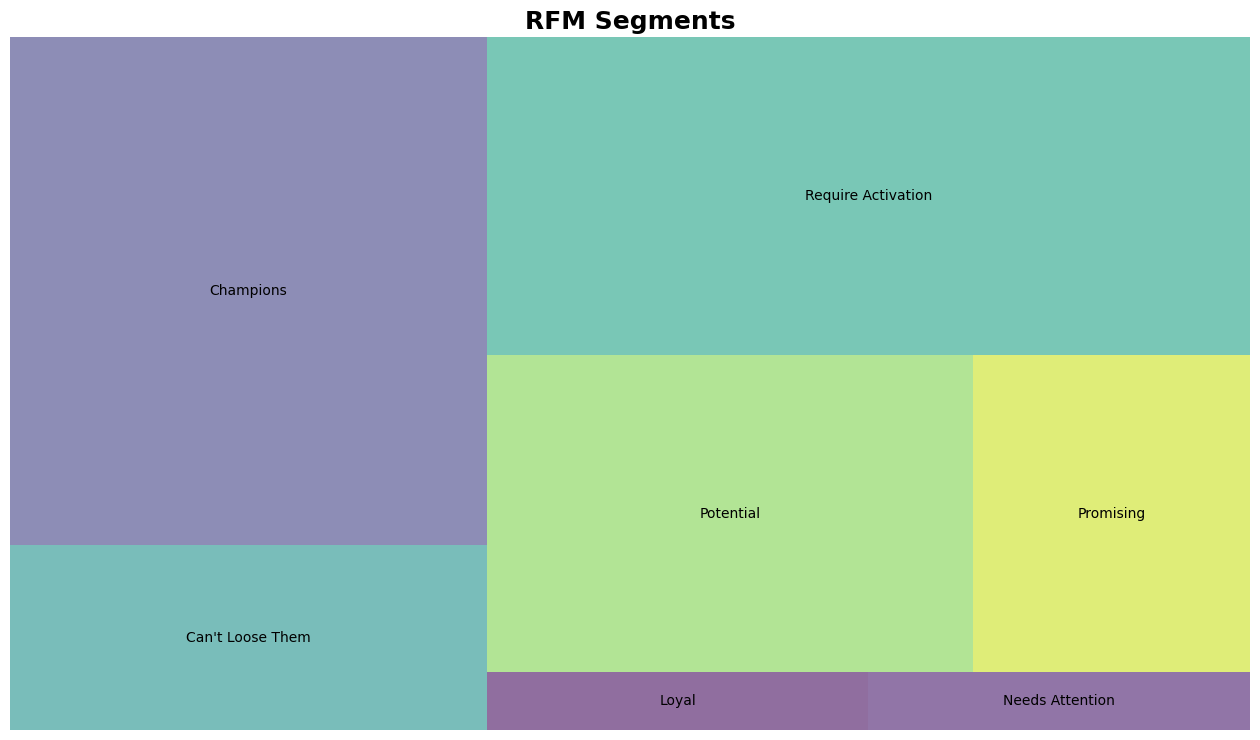

In [370]:
rfm_df_agg.columns = rfm_df_agg.columns
rfm_df_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_df_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential',  #,
                     'Promising', 
                     'Require Activation'
                    ], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
### Applying K-Means for clustering customers

In [227]:
/////////////// K-means with elbow method ///////////////////////

C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

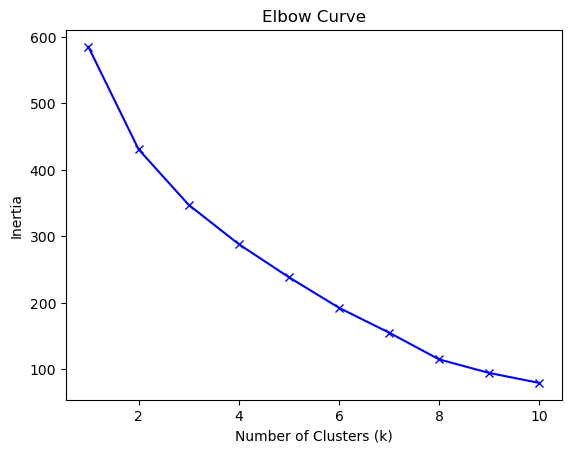

C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12436\574463752.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = rfm_data.groupby('Cluster').mean()


In [371]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

rfm_df_encoded = pd.get_dummies(rfm_data, columns=['RFM_Level'])

# Standardize the RFM data
scaler = StandardScaler()
rfm_data_scaled = scaler.fit_transform(rfm_df_encoded)


inertias = []
k_values = range(1, 11)  # Try different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_data_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(rfm_data_scaled)

# Assign the cluster labels to the original DataFrame
rfm_data['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_summary = rfm_data.groupby('Cluster').mean()



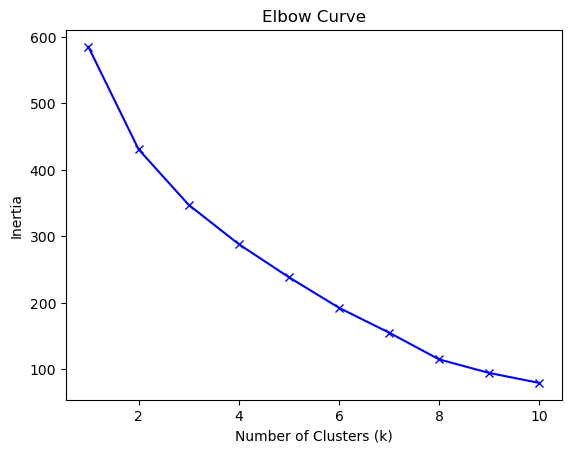

In [372]:
# Plot the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [373]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(rfm_df_encoded)

C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [374]:
rfm_data.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,RFM_Level,Cluster
0,2344,-76,32,334.63,0,4,4,8,Champions,1
1,7821,156,2,9.80,4,0,1,5,Promising,0
2,20211,-83,4,7.94,0,2,0,2,Require Activation,2
3,34088,-56,16,73.60,1,4,3,8,Champions,1
4,45132,101,11,255.03,3,3,3,9,Can't Loose Them,1


In [375]:
rfm_data.shape

(39, 10)

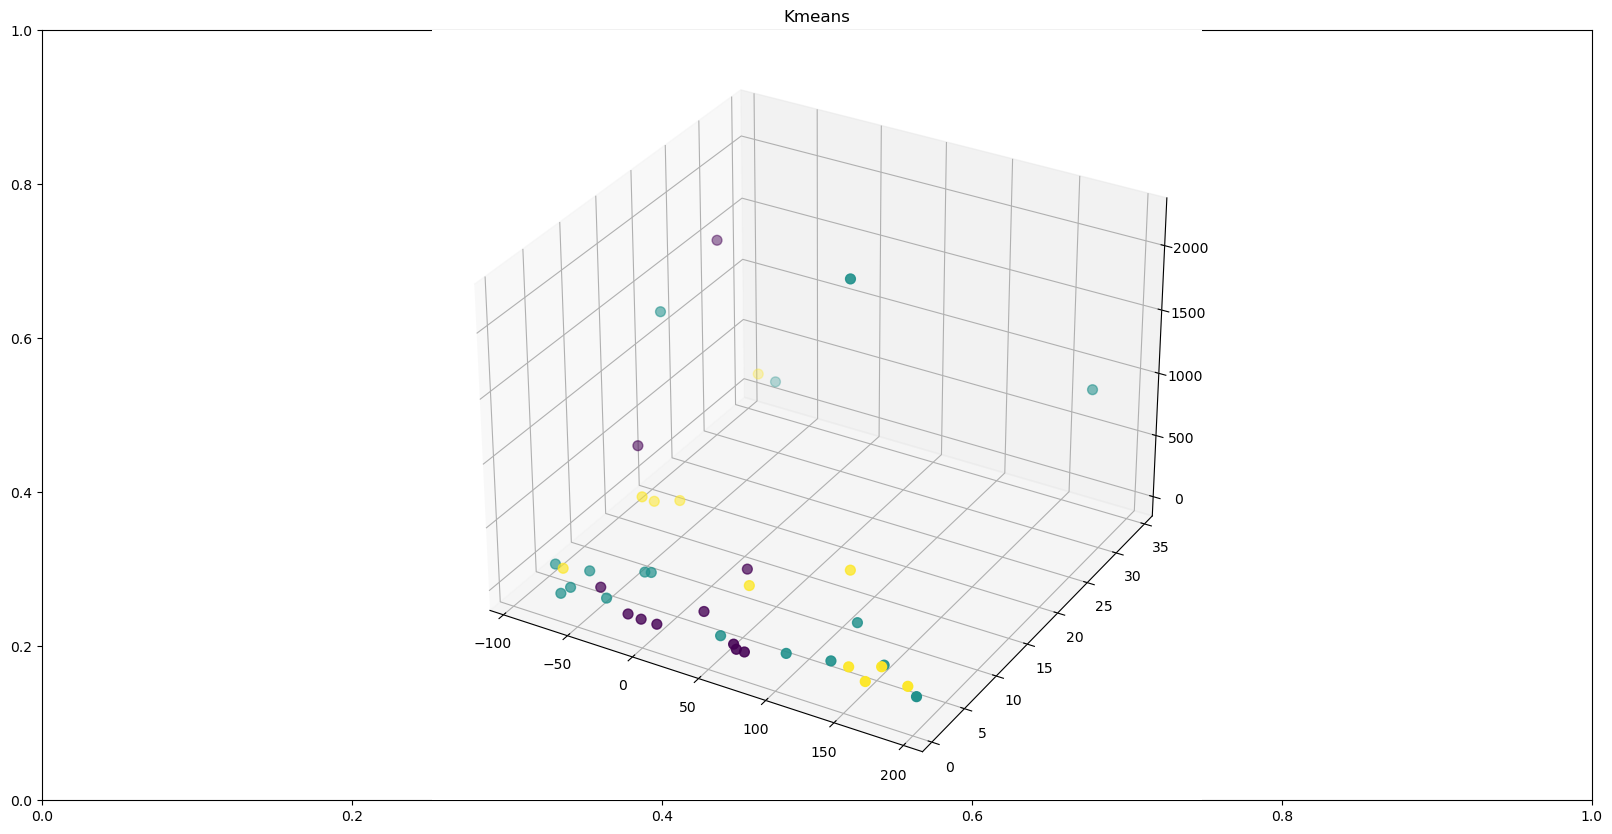

In [376]:
plt.figure(figsize = (20,10))
plt.title("Kmeans")
ax = plt.axes(projection='3d')
fg = ax.scatter3D(rfm_data['recency'],rfm_data['frequency'],rfm_data['monetary'],s = 50, c = y_kmeans,)

In [377]:
silhouette_avg = silhouette_score(rfm_df_encoded,y_kmeans)
print("For n_clusters =", 3 ,"The average silhouette_score is :",silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.595441026320669


In [ ]:
////////////////////////////////////using k-means with pca to plot in 2 d/////////////////////////////////////

C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


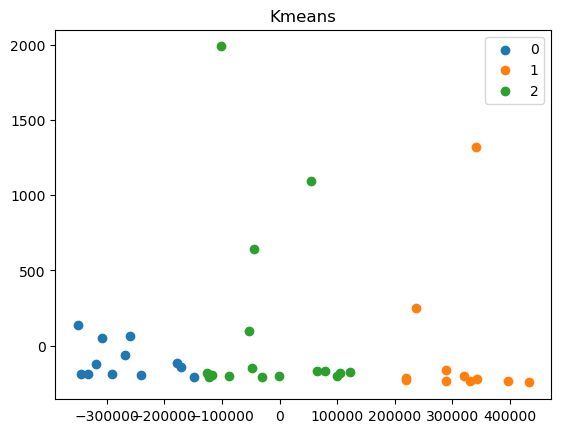

In [378]:
#Importing required modules
 
from sklearn.decomposition import PCA
import numpy as np
 
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(rfm_df_encoded)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.title("Kmeans")
plt.show()

In [379]:
# for the 2d data
silhouette_avg = silhouette_score(df,label)
print("For n_clusters =", 3 ,"The average silhouette_score is :",silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5902148120242716


In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
# Core 01 Customer Focus: prevention of the churn of high value customers by a marketing 
# campaign for customer retention [CHURN + RFM];

In [ ]:
# Calculate the monetary value for each customer by aggregating their total spending (gross_price) over a given 
# period(365 days):

In [509]:
# Perform churn analysis and determine the churn status of each high-value customer

In [510]:
# Define the time period for churn analysis, such as the last 365 days. Set the cutoff date for the analysis.

In [262]:
df = pd.read_csv('dataframe.csv')
# Drop rows where direction = -1
df = df[df['direction'] != -1].copy()
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [263]:
import datetime

# Convert the 'purchase_datetime' column to datetime type
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])


In [264]:
import datetime

# Set the cutoff date as the max purchase date minus 365 days

cutoff_date = df['purchase_datetime'].max() - datetime.timedelta(days=365)

# Convert the cutoff date to datetime64[ns] type
cutoff_date = pd.to_datetime(cutoff_date)

# Filter the purchase data of high-value customers within the churn analysis period

churn_analysis_data = df[df['customer_id'] & (pd.to_datetime(df['purchase_datetime']) >= cutoff_date)]


In [265]:
churn_analysis_data.head()

,address_id,postal_code,district,region,customer_id,birthdate,gender,job_type,email_provider,flag_phone_provided,...,loyatlty_status,activation_date,order_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,6962,29121,PC,EMILIA ROMAGNA,7821,1984-10-03,M,0,gmail.com,1.0,...,1,2022-04-06,cff01b663e65a4a426add3d3591dd113,11,33700716,1,0.2,0.00,2022-08-23 13:13:03,10
1,228406,24022,BG,LOMBARDIA,246969,1978-12-27,F,0,personal_mail_provider_7382,1.0,...,1,2022-03-13,8f7735a267cccb1e922a38d31b8f4b0b,40,33700716,1,0.2,0.00,2022-07-21 11:50:07,10
2,278496,125,RM,LAZIO,298715,1977-04-29,F,0,gmail.com,0.0,...,1,2022-04-08,8025322b509df76b6684eca2d262fde7,39,33700716,1,0.2,0.02,2022-06-03 09:22:35,10
3,278496,125,RM,LAZIO,298715,1977-04-29,F,0,gmail.com,0.0,...,1,2022-04-08,61b4e60e8f1503508a0f739e43b49df1,39,33700716,1,0.2,0.00,2023-03-28 12:30:35,10
4,385332,6059,PG,UMBRIA,406505,1976-04-26,F,0,gmail.com,1.0,...,1,2022-06-02,de7f5649c28e00f03cace55339474a35,9,33700716,1,0.2,0.00,2022-08-04 18:25:49,10


In [266]:
churn_analysis_data.shape

(219, 25)

In [267]:
COUNT  = churn_analysis_data['customer_id'].nunique()
COUNT

31

In [268]:
# # # Group the churn analysis data by customer and count the number of purchases



In [340]:
# Group the churn analysis data by customer and count the number of purchases
customer_purchases = churn_analysis_data.groupby('customer_id')['purchase_datetime'].count()

# Identify churned customers who have no purchases within the churn analysis period
churned_customers = customer_purchases[customer_purchases < 12].index.tolist()

# Create a new DataFrame with 'customer_id' and 'purchases'
purchases_df = pd.DataFrame({'customer_id': customer_purchases.index, 'purchases': customer_purchases.values})

# Display the new purchases DataFrame
# print(purchases_df)


In [341]:
purchases_df

,customer_id,purchases
0,7821,4
1,20211,6
2,40587,2
3,84587,9
4,93263,14
5,94505,1
6,181555,17
7,203601,3
8,225861,4
9,229985,4


In [153]:
# customer_purchases  

In [342]:
churned_customers

[7821,
 20211,
 40587,
 84587,
 94505,
 203601,
 225861,
 229985,
 234763,
 246969,
 264555,
 289021,
 352089,
 420521,
 431885,
 458071,
 531249,
 548505,
 664885,
 672955,
 684219,
 696001,
 749375,
 785061,
 792819]

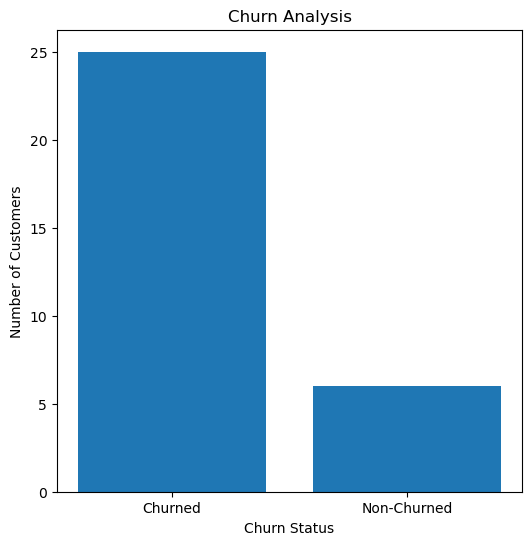

In [384]:

# Count the number of churned customers
num_churned = len(churned_customers)

# Plot the number of churned customers
plt.figure(figsize=(6, 6))
plt.bar(['Churned', 'Non-Churned'], [num_churned, len(customer_purchases) - num_churned])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Churn Analysis')
plt.show()


In [344]:
notChurned = len(customer_purchases) - num_churned
notChurned

6

In [ ]:
# Consider Customers churn where purchases less than 12 

In [274]:
# Add a new column 'Churn' based on 'purchases' values
purchases_df['Churn'] = purchases_df['purchases'].apply(lambda x: 1 if x < 12 else 0)

# Display the updated purchases_df DataFrame
# print(purchases_df)


In [275]:
purchases_df

,customer_id,purchases,Churn
0,7821,4,1
1,20211,6,1
2,40587,2,1
3,84587,9,1
4,93263,14,0
5,94505,1,1
6,181555,17,0
7,203601,3,1
8,225861,4,1
9,229985,4,1


In [ ]:
# Merging dataframes rfm_data and purchases_df 

In [283]:
#Merge dataframes based on 'customer_id'
rfm_data = rfm_data.merge(purchases_df, on='customer_id', how='inner')

In [285]:
rfm_data.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'recency_score',
       'frequency_score', 'monetary_score', 'rfm_score', 'purchases', 'Churn'],
      dtype='object')

In [280]:
# rfm_data.drop(['purchases_x','purchases_y','Churn_x','Churn_y'], axis = 1, inplace = True)

In [284]:
rfm_data

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,purchases,Churn
0,7821,160,4,18.90,4,2,1,7,4,1
1,20211,-78,6,13.69,0,3,1,4,6,1
2,40587,17,2,68.88,2,0,3,5,2,1
3,84587,49,9,218.28,2,3,3,8,9,1
4,93263,-59,14,536.13,1,4,4,9,14,0
5,94505,9,1,6.99,2,0,0,2,1,1
6,181555,-66,17,69.09,0,4,3,7,17,0
7,203601,-63,3,8.34,0,1,0,1,3,1
8,225861,102,4,48.96,3,2,2,7,4,1
9,229985,53,4,26.34,2,2,2,6,4,1


In [ ]:
# Creating new data frame by merging df and rfm_data 

In [288]:
dfChurn = pd.merge(df, rfm_data, on='customer_id')

# Selecting the relevant attributes for churn prediction

dfChurn = dfChurn[['customer_id','recency', 'loyatlty_status', 'Churn']]

In [290]:
dfChurn.drop_duplicates().head()

,customer_id,recency,loyatlty_status,Churn
0,7821,160,1,1
4,246969,193,1,1
5,298715,-58,1,0
39,406505,-86,1,0
61,640999,32,1,0


In [291]:
dfChurn

,customer_id,recency,loyatlty_status,Churn
0,7821,160,1,1
1,7821,160,1,1
2,7821,160,1,1
3,7821,160,1,1
4,246969,193,1,1
...,...,...,...,...
214,289021,148,1,1
215,531249,124,1,1
216,531249,124,1,1
217,420521,234,1,1


In [292]:
dfChurn.columns

Index(['customer_id', 'recency', 'loyatlty_status', 'Churn'], dtype='object')

In [523]:
# Applying Machine Learning Algorithms for churn prediction, such as Logistic Regression, 
# Random Forest, Multilayer Perceptrons, Gradient Boosting Machine. 
# Fit the selected model to the training data.

In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [316]:

X = dfChurn[['customer_id', 'recency', 'loyatlty_status']]
y = dfChurn['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [318]:
X_train

,customer_id,recency,loyatlty_status
79,93263,-59,1
161,431885,-57,1
112,308545,179,1
109,308545,179,1
101,308545,179,1
...,...,...,...
106,308545,179,1
14,298715,-58,1
92,93263,-59,1
179,84587,49,1


In [319]:

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5227272727272727
Precision: 0.4
Recall: 0.3333333333333333
F1-score: 0.3636363636363636


In [286]:
### Random Forest Classifier

In [320]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9772727272727273
Precision: 1.0
Recall: 0.9444444444444444
F1-score: 0.9714285714285714


In [ ]:
### Multilayer Perceptron

In [322]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlp_clf = MLPClassifier()  # Instantiate an instance of the MLPClassifier
mlp_clf.fit(X_train, y_train)  # Fit the model to the training data

y_pred = mlp_clf.predict(X_test)  # Make predictions on the test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5909090909090909
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\Admin\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
###  Gradient Boosting Machine

In [324]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier() 

# Fit the model to the training data
gbm_clf.fit(X_train, y_train)  

# Make predictions on the test data
y_pred = gbm_clf.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9772727272727273
Precision: 1.0
Recall: 0.9444444444444444
F1-score: 0.9714285714285714


In [ ]:
### ROC curve and AUC

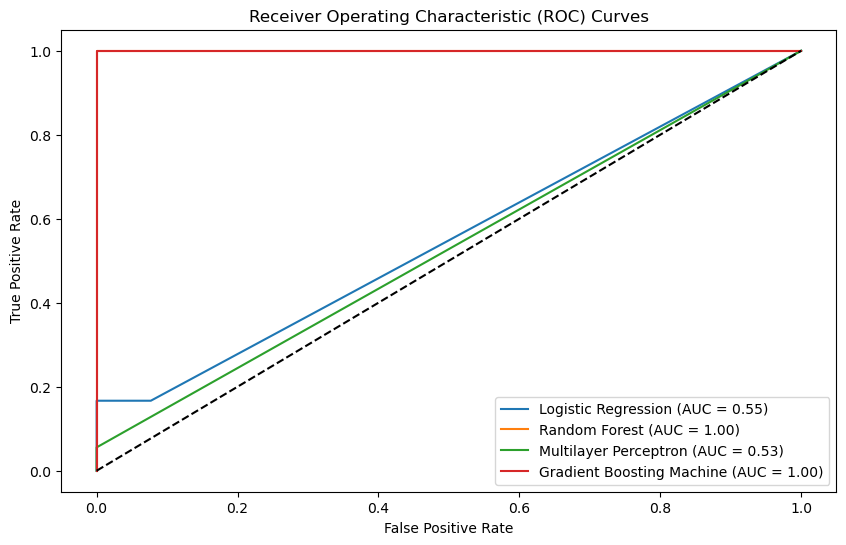

In [385]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifiers = {
    "Logistic Regression": model,
    "Random Forest": rf_clf,
    "Multilayer Perceptron": mlp_clf,
    "Gradient Boosting Machine": gbm_clf,
#     "Decision Tree" : dct_clf
}

plt.figure(figsize=(10, 6))

# Plot ROC curve for each classifier
for name, clf in classifiers.items():
    y_pred_probs = clf.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////